# Forest Cover Classification Using Gaussian Naive Bayes

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Reading the dataset
data_set = pd.read_csv('covtype.csv')
data_set.shape

(581012, 55)

In [3]:
# Checking for null values in the dataset
data_set.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [4]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['Cover_Type']

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((435759, 54), (145253, 54))

In [6]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Finding the Best Parameters Using Halving Grid Search

In [7]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=50)
}

In [13]:
halving_search = HalvingGridSearchCV(estimator=GaussianNB(),
                                     param_grid=param_grid,
                                     cv=5,
                                     factor=4,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 27234
max_resources_: 435759
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 50
n_resources: 27234
Fitting 5 folds for each of 50 candidates, totalling 250 fits
----------
iter: 1
n_candidates: 13
n_resources: 108936
Fitting 5 folds for each of 13 candidates, totalling 65 fits
----------
iter: 2
n_candidates: 4
n_resources: 435744
Fitting 5 folds for each of 4 candidates, totalling 20 fits


HalvingGridSearchCV(estimator=GaussianNB(), factor=4, n_jobs=-1,
                    param_grid={'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-03,
       1.15139540e-0...
       3.90693994e-05, 2.55954792e-05, 1.67683294e-05, 1.09854114e-05,
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
                    verbose=3)

In [14]:
# Best parameters found by HalvingGridSearchCV
print('Best score:',halving_search.best_score_)
print('Best parameters found:',halving_search.best_params_)

Best score: 0.46383164272272454
Best parameters found: {'var_smoothing': np.float64(1.0)}


### Visualizing the Results

In [15]:
results = pd.DataFrame(halving_search.cv_results_)

sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'].values[sorted_indices]
sorted_params = results['params'].values[sorted_indices]

top_params = [str(params) for params in sorted_params[:10]]
top_scores = [str(sc) for sc in sorted_scores[:10]]
param_lb = []
for i in range(1,11):
    param_lb.append('Parameter Combination ' + str(i))

print('Top 10 Parameter Combinations:')
for i in range(len(top_params)):
    print('Parmeter Combination',i+1)
    print(top_params[i])
    print('Score:',top_scores[i])
    print()

Top 10 Parameter Combinations:
Parmeter Combination 1
{'var_smoothing': np.float64(1.0)}
Score: 0.5058391479985309

Parmeter Combination 2
{'var_smoothing': np.float64(1.0)}
Score: 0.4917060632487263

Parmeter Combination 3
{'var_smoothing': np.float64(0.6551285568595508)}
Score: 0.47965479250826293

Parmeter Combination 4
{'var_smoothing': np.float64(0.4291934260128778)}
Score: 0.4743297833272126

Parmeter Combination 5
{'var_smoothing': np.float64(0.6551285568595508)}
Score: 0.4698857116629183

Parmeter Combination 6
{'var_smoothing': np.float64(0.281176869797423)}
Score: 0.46768270290121194

Parmeter Combination 7
{'var_smoothing': np.float64(1.0)}
Score: 0.46383164272272454

Parmeter Combination 8
{'var_smoothing': np.float64(0.1842069969326716)}
Score: 0.456188027910393

Parmeter Combination 9
{'var_smoothing': np.float64(0.4291934260128778)}
Score: 0.4550970762381237

Parmeter Combination 10
{'var_smoothing': np.float64(0.6551285568595508)}
Score: 0.45481709276173865



## Designing the Gaussian Naive Bayes Model with the Optimal Hyperparameters

In [16]:
best_gnb_clf = halving_search.best_estimator_

# Making predictions with the best estimator
y_train_pred = best_gnb_clf.predict(X_train) # type: ignore
y_test_pred = best_gnb_clf.predict(X_test) # type: ignore

In [17]:
# Computing the performance metrics for the training subset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy*100,3))
print("Training Precision (in %):",round(train_precision*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1*100,3)) # type: ignore

Training Accuracy (in %): 46.011
Training Precision (in %): 66.014
Training Recall (in %): 46.011
Training F1 Score (in %): 38.916


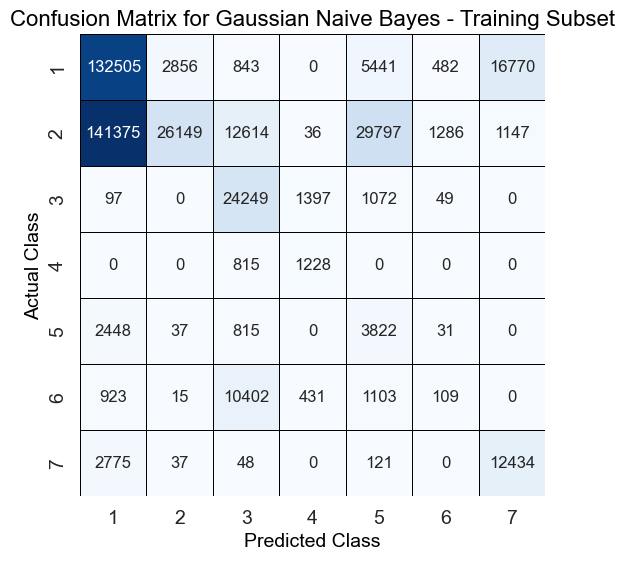

In [18]:
conf_mat_train = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_gnb_clf.classes_, yticklabels=best_gnb_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Gaussian Naive Bayes - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

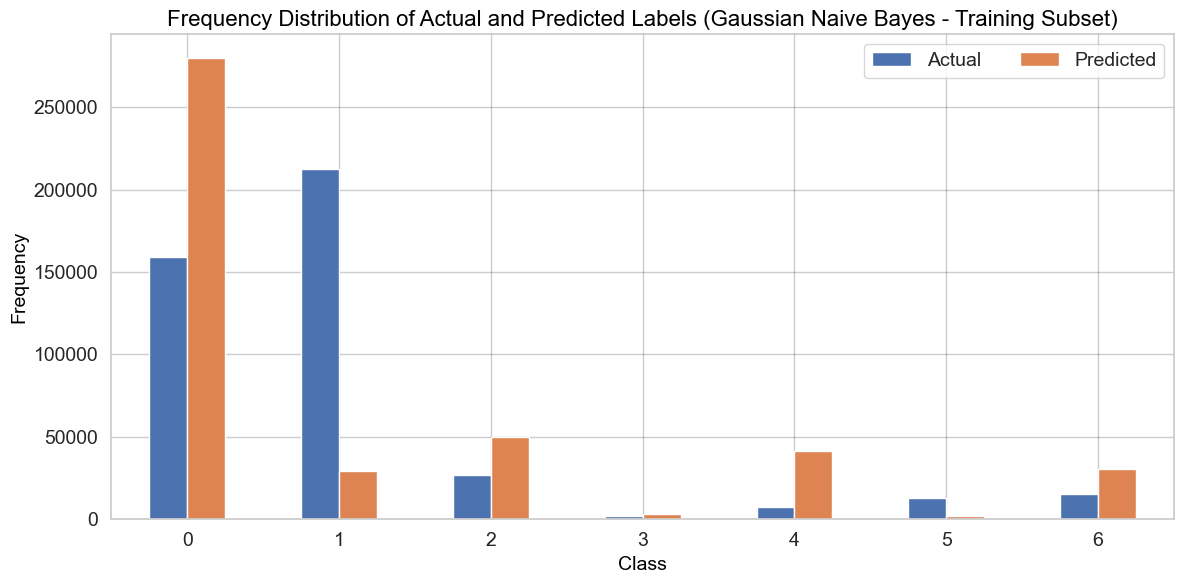

In [19]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train, predicted_counts_train = np.unique(y_train_pred, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Gaussian Naive Bayes - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) # type: ignore
fig.tight_layout()
plt.show()

In [20]:
# Computing the performance metrics for the test subset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy*100,3))
print("Test Precision (in %):",round(test_precision*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1*100,3)) # type: ignore

Test Accuracy (in %): 45.765
Test Precision (in %): 65.648
Test Recall (in %): 45.765
Test F1 Score (in %): 38.583


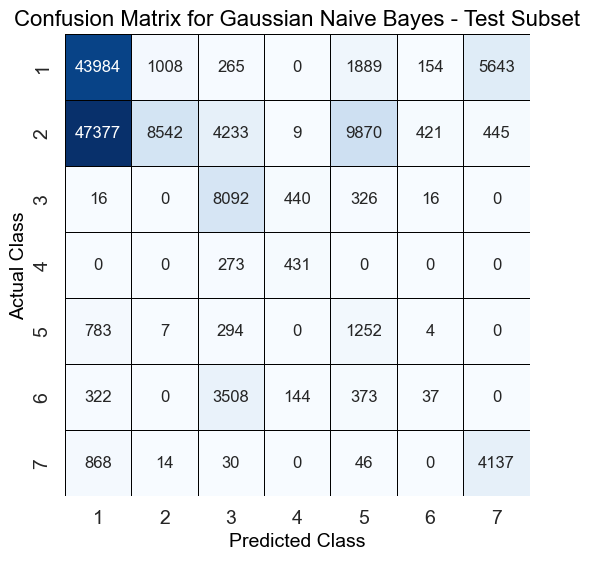

In [21]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_gnb_clf.classes_, yticklabels=best_gnb_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Gaussian Naive Bayes - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

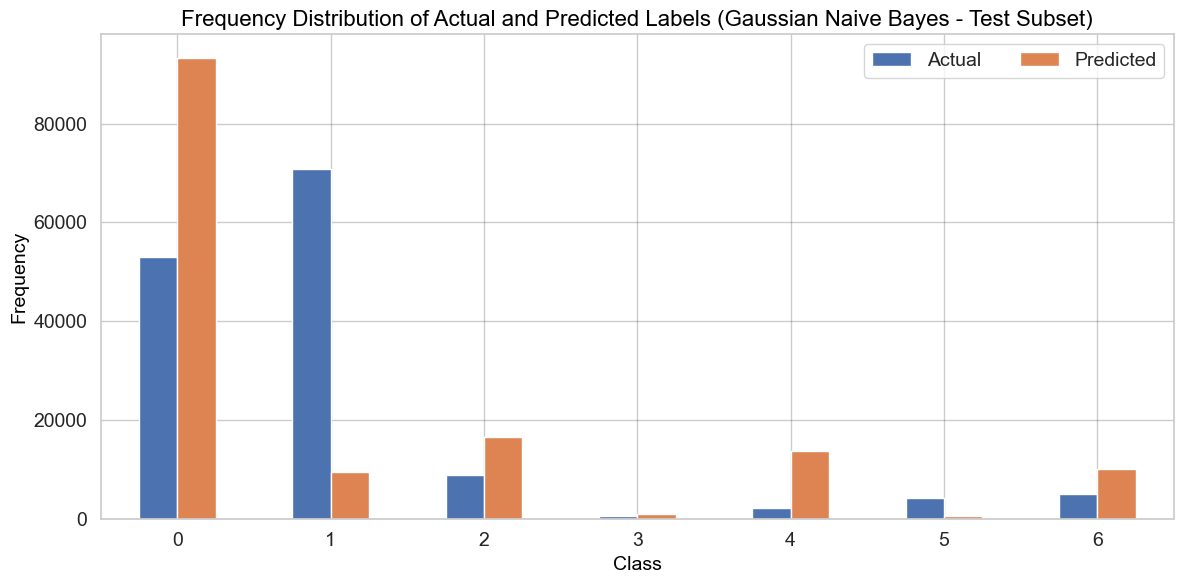

In [22]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test, predicted_counts_test = np.unique(y_test_pred, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Gaussian Naive Bayes - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) # type: ignore
fig.tight_layout()
plt.show()

In [23]:
import joblib

# Saving the model
joblib.dump(best_gnb_clf, 'GaussianNB_ForestCover.pkl')

['GaussianNB_ForestCover.pkl']

***